In [1]:
import numpy as np
import keras
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
plt.rcParams.update({'font.size': 14, 'mathtext.fontset': 'stix', 'font.family': 'STIXGeneral'})

In [3]:
batchSize = 10

In [4]:
model_epochs_full = 20
dataset_path_full = ".../dataset_small"

In [5]:
mobile = keras.models.load_model('model_0600.h5')

In [6]:
mobile.summary()

Model: "model_599"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_945 (InputLayer)       [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_9244 (Conv2D)         (None, 64, 64, 16)        64        
_________________________________________________________________
batch_normalization_14827 (B (None, 64, 64, 16)        64        
_________________________________________________________________
re_lu_14827 (ReLU)           (None, 64, 64, 16)        0         
_________________________________________________________________
depthwise_conv2d_6527 (Depth (None, 64, 64, 16)        160       
_________________________________________________________________
batch_normalization_14828 (B (None, 64, 64, 16)        64        
_________________________________________________________________
re_lu_14828 (ReLU)           (None, 64, 64, 16)        0 

In [7]:
# datasets
dataGen = ImageDataGenerator(validation_split=0.1, 
                             preprocessing_function=keras.applications.mobilenet.preprocess_input)

trainBatch = dataGen.flow_from_directory(dataset_path_full, target_size=(128,128), batch_size=batchSize, subset='training')

validateBatch = dataGen.flow_from_directory(dataset_path_full, target_size=(128,128), batch_size=batchSize, subset='validation', shuffle=False)

Found 540 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [8]:
mobile.fit_generator(trainBatch, steps_per_epoch=len(trainBatch), validation_data=validateBatch, validation_steps=len(validateBatch), epochs=model_epochs_full)

/home/amirhossein/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
54/54 [==============================] - 11s 144ms/step - loss: 0.5542 - accuracy: 0.7407 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/20
54/54 [==============================] - 6s 115ms/step - loss: 0.2867 - accuracy: 0.8815 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 3/20
54/54 [==============================] - 6s 112ms/step - loss: 0.1843 - accuracy: 0.9407 - val_loss: 0.7244 - val_accuracy: 0.5000
Epoch 4/20
54/54 [==============================] - 6s 116ms/step - loss: 0.1670 - accuracy: 0.9389 - val_loss: 0.7775 - val_accuracy: 0.5000
Epoch 5/20
54/54 [==============================] - 6s 115ms/step - loss: 0.1110 - accuracy: 0.9593 - val_loss: 0.7026 - val_accuracy: 0.5000
Epoch 6/20
54/54 [==============================] - 6s 117ms/step - loss: 0.0918 - accuracy: 0.9704 - val_loss: 0.5639 - val_accuracy: 0.5333
Epoch 7/20
54/54 [==============================] - 7s 122ms/step - loss: 0.1026 - accuracy: 0.9704 - val_loss: 0.5045 - val_accuracy: 0.6833
Epoch

KeyboardInterrupt: 

In [11]:
# mobile.save("trained_openclose_model600_hard.h5")

In [9]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion_matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], 
                horizontalalignment='center', 
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[28  2]
 [ 0 30]]


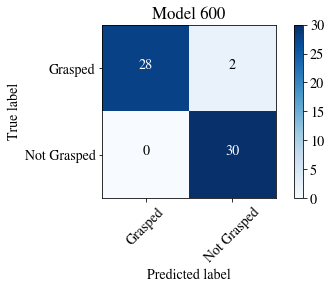

In [12]:
valLabels = validateBatch.classes
predictions = mobile.predict_generator(validateBatch, steps= len(valLabels)//batchSize+1)
cm = confusion_matrix(valLabels, predictions.argmax(axis=1))
cmPlotLabels = ['Grasped', 'Not Grasped']
plot_confusion_matrix(cm, cmPlotLabels, title='Model 600')